## Data source

- **The Toronto Shootings and Firearm Discharges**

retrieved from https://data.torontopolice.on.ca/datasets/TorontoPS::shootings-and-firearm-discharges/about

This dataset includes all the shooting incidents documented by Toronto Police Department from 2005 to 2021. It detailed the dates and exact time of the shooting incidents, injuries and deaths resulting from the shootings, and the neighbourhoods the incidents occurred in.

- **The Toronto Neighbourhood Profiles**

retrieved from https://open.toronto.ca/dataset/neighbourhood-profiles/ 

In these profiles, "neighbourhood" refers to the City of Toronto's 140 social planning neighbourhoods. The data is sourced from a number of Census tables released by Statistics Canada for the 2016 Census. The general Census Profile is the main source table for this data, but other Census tables have also been used to provide additional information. 

The names, number/codes and boundaries of each neigbourhood are consistent with the ones in Shootings and Firearm Discharges so we can join the two datasets.

In [77]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import pandas as pd

df = pd.read_csv("neighbourhood-profiles-2016-csv.csv")

## Data loading

The Toronto Neighbourhood Profiles contain 2383 rows and 146 columns. The neighbourhoods are in columns and the attributes are in rows.

In [2]:
df

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,...,37,7,137,64,60,94,100,97,27,31
1,2,Neighbourhood Information,Neighbourhood Information,City of Toronto,TSNS2020 Designation,NaN,No Designation,No Designation,No Designation,No Designation,...,No Designation,No Designation,NIA,No Designation,No Designation,No Designation,No Designation,No Designation,NIA,Emerging Neighbourhood
2,3,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016","2,731,571","29,113","23,757","12,054","30,526",...,"16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"
3,4,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2011","2,615,060","30,279","21,988","11,904","29,177",...,"15,004","21,343","53,350","11,703","7,826","13,986","10,578","11,652","27,713","14,687"
4,5,Population,Population and dwellings,Census Profile 98-316-X2016001,Population Change 2011-2016,4.50%,-3.90%,8.00%,1.30%,4.60%,...,12.90%,3.80%,0.30%,7.20%,0.50%,2.60%,11.70%,7.50%,-0.40%,0.80%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2378,2379,Mobility,Mobility status - Place of residence 5 years ago,Census Profile 98-316-X2016001,Migrants,"400,950","3,170","3,145",925,"6,390",...,"3,765","2,270","7,260",985,620,"1,350","2,425","2,310","4,965","1,345"
2379,2380,Mobility,Mobility status - Place of residence 5 years ago,Census Profile 98-316-X2016001,Internal migrants,"184,120",880,980,680,"3,930",...,"1,545","1,110","1,720",610,395,780,"1,260","1,355","1,700",580
2380,2381,Mobility,Mobility status - Place of residence 5 years ago,Census Profile 98-316-X2016001,Intraprovincial migrants,"141,135",735,760,615,"2,630",...,"1,070",960,"1,400",350,320,570,970,"1,025","1,490",445
2381,2382,Mobility,Mobility status - Place of residence 5 years ago,Census Profile 98-316-X2016001,Interprovincial migrants,"42,985",135,220,70,"1,310",...,475,150,335,250,85,210,290,325,195,135


In [3]:
df["Category"].nunique()

15

The attributes contain 15 categories: 'Neighbourhood Information', 'Population', 'Families, households and marital status', 'Language', 'Income', 'Immigration and citizenship', 'Visible minority', 'Ethnic origin', 'Aboriginal peoples', 'Education', 'Housing', 'Language of work', 'Labour', 'Journey to work', 'Mobility'.

Each category contains a few Topics, then specific Characteristic. Since the dataset is very large and complex, we don't want to load everything, and we will only use the ones that might be relevant with the project:

- check each category, then topic
- choose the ones that we find useful, either the whole category or topic, or just a few characteristics
- save them as individual dataframe, then combine together into "selected dataset"
- perform data cleaning and processing on the "selected dataset"

We use the following cells to explore the dataset just by changing the column name in the query (no need to write function). Take a look at each category and see what's inside, what might be needed for the analysis, etc.

In [209]:
df[df["Category"] == "Income"].groupby("Topic").count()

,_id,Category,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
Topic,,,,,,,,,,,,,,,,,,,,,
Income of economic families in 2015,44,44,44,44,44,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
Income of households in 2015,59,59,59,59,59,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
Income of individuals in 2015,80,80,80,80,80,62,62,62,62,62,...,62,62,62,62,62,62,62,62,62,62
Income sources,94,94,94,94,94,94,94,94,94,94,...,94,94,94,94,94,94,94,94,94,94
Income taxes,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
Low income in 2015,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25


In [211]:
df[(df["Category"] == "Income") & 
   (df["Topic"].str.contains("Income of households in 2015")) & (df["Annex"].notnull())]

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
268,269,Income,Income of households in 2015,Census Profile 98-316-X2016001,"$150,000 to $199,999","77,810",595,475,560,"1,130",...,565,760,855,625,365,460,430,465,445,380
1017,1018,Income,Income of households in 2015,Census Profile 98-316-X2016001,Total - Income statistics in 2015 for private ...,"1,112,930","9,120","8,130","4,620","15,940",...,"7,550","8,510","18,430","5,450","3,445","5,895","5,670","7,015","10,175","5,340"
1020,1021,Income,Income of households in 2015,Census Profile 98-316-X2016001,Total - Income statistics in 2015 for one-...,"359,955","1,345","1,620","1,105","7,885",...,"2,660","2,170","4,220","1,860","1,105","2,080","2,365","3,475","2,660","1,355"
1021,1022,Income,Income of households in 2015,Census Profile 98-316-X2016001,"$15,000 to $19,999","54,025",450,265,90,740,...,605,295,"1,170",315,195,395,175,220,520,220
1023,1024,Income,Income of households in 2015,Census Profile 98-316-X2016001,Total - Income statistics in 2015 for two-...,"752,970","7,770","6,515","3,510","8,045",...,"4,890","6,330","14,225","3,590","2,340","3,815","3,310","3,535","7,505","3,985"
1026,1027,Income,Income of households in 2015,Census Profile 98-316-X2016001,Total - Income statistics in 2015for private h...,"1,112,930","9,120","8,135","4,615","15,940",...,"7,565","8,505","18,435","5,450","3,450","5,895","5,675","7,020","10,165","5,340"
1028,1029,Income,Income of households in 2015,Census Profile 98-316-X2016001,"$100,000 to $124,999","100,810",955,790,520,"1,220",...,635,880,"1,660",520,380,455,460,580,825,515
1029,1030,Income,Income of households in 2015,Census Profile 98-316-X2016001,Average after-tax income of households in 20...,"81,495","427,037","278,390","168,602","792,507",...,"272,986","412,302","629,030","240,272","147,462","239,484","222,648","541,217","302,358","213,860"
1030,1031,Income,Income of households in 2015,Census Profile 98-316-X2016001,Total - Income statistics in 2015 for one-...,"359,990","1,360","1,615","1,115","7,895",...,"2,705","2,175","4,235","1,875","1,105","2,065","2,370","3,520","2,655","1,350"
1033,1034,Income,Income of households in 2015,Census Profile 98-316-X2016001,Total - Income statistics in 2015 for two-...,"752,940","7,770","6,520","3,500","8,040",...,"4,850","6,345","14,200","3,585","2,345","3,835","3,305","3,495","7,525","3,990"


In [85]:
df[df["Category"]=="Mobility"]

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
2365,2366,Mobility,Mobility status - Place of residence 1 year ago,Census Profile 98-316-X2016001,Total - Mobility status 1 year ago - 25% sampl...,"2,663,555","28,595","23,235","11,860","28,385",...,"16,530","21,915","52,390","12,250","7,760","13,125","11,660","12,210","27,260","13,915"
2366,2367,Mobility,Mobility status - Place of residence 1 year ago,Census Profile 98-316-X2016001,Non-movers,"2,284,060","25,775","20,155","10,895","21,980",...,"12,995","19,805","45,720","10,965","6,830","11,465","9,345","9,835","23,155","12,445"
2367,2368,Mobility,Mobility status - Place of residence 1 year ago,Census Profile 98-316-X2016001,Movers,"379,495","2,830","3,070",965,"6,395",...,"3,535","2,120","6,675","1,280",930,"1,655","2,310","2,370","4,100","1,470"
2368,2369,Mobility,Mobility status - Place of residence 1 year ago,Census Profile 98-316-X2016001,Non-migrants,"253,780","1,875","2,180",640,"4,275",...,"2,295","1,450","4,695","1,045",725,"1,240","1,515","1,690","2,740","1,140"
2369,2370,Mobility,Mobility status - Place of residence 1 year ago,Census Profile 98-316-X2016001,Migrants,"125,715",950,895,330,"2,120",...,"1,245",665,"1,990",230,200,425,800,685,"1,360",325
2370,2371,Mobility,Mobility status - Place of residence 1 year ago,Census Profile 98-316-X2016001,Internal migrants,"65,770",345,395,260,"1,280",...,725,400,670,155,145,195,470,420,690,190
2371,2372,Mobility,Mobility status - Place of residence 1 year ago,Census Profile 98-316-X2016001,Intraprovincial migrants,"49,990",275,320,220,900,...,470,365,510,115,120,140,345,320,500,145
2372,2373,Mobility,Mobility status - Place of residence 1 year ago,Census Profile 98-316-X2016001,Interprovincial migrants,"15,780",75,90,40,385,...,250,30,160,55,20,60,130,110,180,35
2373,2374,Mobility,Mobility status - Place of residence 1 year ago,Census Profile 98-316-X2016001,External migrants,"59,945",605,490,70,835,...,520,280,"1,295",60,60,225,325,265,680,140
2374,2375,Mobility,Mobility status - Place of residence 5 years ago,Census Profile 98-316-X2016001,Total - Mobility status 5 years ago - 25% samp...,"2,556,120","27,490","22,325","11,370","27,715",...,"15,945","20,945","49,910","11,530","7,400","12,630","11,230","11,865","26,110","13,420"


In [86]:
df[df["Topic"] == "Mobility status - Place of residence 1 year ago"]

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
2365,2366,Mobility,Mobility status - Place of residence 1 year ago,Census Profile 98-316-X2016001,Total - Mobility status 1 year ago - 25% sampl...,"2,663,555","28,595","23,235","11,860","28,385",...,"16,530","21,915","52,390","12,250","7,760","13,125","11,660","12,210","27,260","13,915"
2366,2367,Mobility,Mobility status - Place of residence 1 year ago,Census Profile 98-316-X2016001,Non-movers,"2,284,060","25,775","20,155","10,895","21,980",...,"12,995","19,805","45,720","10,965","6,830","11,465","9,345","9,835","23,155","12,445"
2367,2368,Mobility,Mobility status - Place of residence 1 year ago,Census Profile 98-316-X2016001,Movers,"379,495","2,830","3,070",965,"6,395",...,"3,535","2,120","6,675","1,280",930,"1,655","2,310","2,370","4,100","1,470"
2368,2369,Mobility,Mobility status - Place of residence 1 year ago,Census Profile 98-316-X2016001,Non-migrants,"253,780","1,875","2,180",640,"4,275",...,"2,295","1,450","4,695","1,045",725,"1,240","1,515","1,690","2,740","1,140"
2369,2370,Mobility,Mobility status - Place of residence 1 year ago,Census Profile 98-316-X2016001,Migrants,"125,715",950,895,330,"2,120",...,"1,245",665,"1,990",230,200,425,800,685,"1,360",325
2370,2371,Mobility,Mobility status - Place of residence 1 year ago,Census Profile 98-316-X2016001,Internal migrants,"65,770",345,395,260,"1,280",...,725,400,670,155,145,195,470,420,690,190
2371,2372,Mobility,Mobility status - Place of residence 1 year ago,Census Profile 98-316-X2016001,Intraprovincial migrants,"49,990",275,320,220,900,...,470,365,510,115,120,140,345,320,500,145
2372,2373,Mobility,Mobility status - Place of residence 1 year ago,Census Profile 98-316-X2016001,Interprovincial migrants,"15,780",75,90,40,385,...,250,30,160,55,20,60,130,110,180,35
2373,2374,Mobility,Mobility status - Place of residence 1 year ago,Census Profile 98-316-X2016001,External migrants,"59,945",605,490,70,835,...,520,280,"1,295",60,60,225,325,265,680,140


In [263]:
pd.set_option('display.max_rows', df.shape[0]+1)
df[df["Category"] == "Language"]["Characteristic"]

127    Knowledge of official languages for the total ...
128                                         English only
129                                          French only
130                                   English and French
131                           Neither English nor French
132    First official language spoken for the total p...
133                                              English
134              Official language minority (percentage)
135                                               French
136                                   English and French
137                           Neither English nor French
138                  Official language minority (number)
139    Mother tongue for the total population excludi...
140                                     Single responses
141                                   Official languages
142                                              English
143                                               French
144                            

### Selected data

These are the attributes that we found relevant with our analysis on shooting incidents:

In [4]:
code = df[df["Characteristic"] == "Neighbourhood Number"]
population = df[df["Category"] == "Population"]
avg_household_size = df[df["Characteristic"] == "Average household size"]
language = df[df["Category"] == "Language"]
edu = df[df["Topic"]=="Highest certificate, diploma or degree"]
mobility = df[df["Topic"] == "Mobility status - Place of residence 1 year ago"]

In [5]:
language_minor = df[df["Characteristic"].str.contains("percentage")]
language_minor

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
134,135,Language,First official language spoken,Census Profile 98-316-X2016001,Official language minority (percentage),1.90%,0.90%,1.00%,1.10%,2.90%,...,1.50%,1.80%,1.20%,2.90%,2.20%,2.40%,2.60%,2.60%,1.20%,1.30%


In [6]:
income = df[(df["Category"] == "Income") & 
   (df["Topic"].str.contains("Income of households in 2015")) & (df["Annex"].notnull())]
income = income[income['Characteristic'].str.contains("Average")]
income

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
1029,1030,Income,Income of households in 2015,Census Profile 98-316-X2016001,Average after-tax income of households in 20...,"81,495","427,037","278,390","168,602","792,507",...,"272,986","412,302","629,030","240,272","147,462","239,484","222,648","541,217","302,358","213,860"


** we found it easier to use neighbourhood code as join key when joining the shooting incident dataset, so it's necessary to keep the code/Neighbourhood Number.

### Dataframe convertion

We may want to use the dataframes individually or collectively; either way we need to:
- drop columns like "id", "Category", "Topic", "Data Source"
- **put neighbourhood in rows and attributes in columns**
- use the attributes in "Characteristic" as column names

So we write a function:

In [7]:
def df_transpose(df):
    df.drop(['_id', 'Category', 'Topic', 'Data Source'], axis=1, inplace=True)
    df_new = df.transpose()
    df_new.columns = df_new.iloc[0] 
    df_new = df_new[1:]
    df_new = df_new.reset_index()
    df_new.rename(columns={'index':'Neighbourhood'}, inplace = True)
    return df_new

Try to save the population attributes:

In [147]:
df_pop = population.append(code)
df_pop

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
2,3,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016","2,731,571","29,113","23,757","12,054","30,526",...,"16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"
3,4,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2011","2,615,060","30,279","21,988","11,904","29,177",...,"15,004","21,343","53,350","11,703","7,826","13,986","10,578","11,652","27,713","14,687"
4,5,Population,Population and dwellings,Census Profile 98-316-X2016001,Population Change 2011-2016,4.50%,-3.90%,8.00%,1.30%,4.60%,...,12.90%,3.80%,0.30%,7.20%,0.50%,2.60%,11.70%,7.50%,-0.40%,0.80%
5,6,Population,Population and dwellings,Census Profile 98-316-X2016001,Total private dwellings,"1,179,057","9,371","8,535","4,732","18,109",...,"8,054","8,721","19,098","5,620","3,604","6,185","6,103","7,475","11,051","5,847"
6,7,Population,Population and dwellings,Census Profile 98-316-X2016001,Private dwellings occupied by usual residents,"1,112,929","9,120","8,136","4,616","15,934",...,"7,549","8,509","18,436","5,454","3,449","5,887","5,676","7,012","10,170","5,344"
7,8,Population,Population and dwellings,Census Profile 98-316-X2016001,Population density per square kilometre,"4,334","3,929","3,034","2,435","10,863",...,"5,820","4,007","4,345","7,838","6,722","8,541","7,162","10,708","2,086","2,451"
8,9,Population,Population and dwellings,Census Profile 98-316-X2016001,Land area in square kilometres,630.2,7.41,7.83,4.95,2.81,...,2.91,5.53,12.31,1.6,1.17,1.68,1.65,1.17,13.23,6.04
9,10,Population,Age characteristics,Census Profile 98-316-X2016001,Children (0-14 years),"398,135","3,840","3,075","1,760","2,360",...,"1,785","3,555","9,625","2,325","1,165","1,860","1,800","1,210","4,045","1,960"
10,11,Population,Age characteristics,Census Profile 98-316-X2016001,Youth (15-24 years),"340,270","3,705","3,360","1,235","3,750",...,"2,230","2,625","7,660","1,035",675,"1,320","1,225",920,"4,750","1,870"
11,12,Population,Age characteristics,Census Profile 98-316-X2016001,Working Age (25-54 years),"1,229,555","11,305","9,965","5,220","15,040",...,"7,480","8,140","21,945","6,165","3,790","6,420","5,860","5,960","12,290","5,860"


In [148]:
df_pop_new = df_transpose(df_pop)
df_pop_new

Characteristic,Neighbourhood,"Population, 2016","Population, 2011",Population Change 2011-2016,Total private dwellings,Private dwellings occupied by usual residents,Population density per square kilometre,Land area in square kilometres,Children (0-14 years),Youth (15-24 years),...,Female: 60 to 64 years,Female: 65 to 69 years,Female: 70 to 74 years,Female: 75 to 79 years,Female: 80 to 84 years,Female: 85 to 89 years,Female: 90 to 94 years,Female: 95 to 99 years,Female: 100 years and over,Neighbourhood Number
0,City of Toronto,"2,731,571","2,615,060",4.50%,"1,179,057","1,112,929","4,334",630.2,"398,135","340,270",...,"81,600","70,180","51,285","43,430","34,965","25,135","13,500","3,475",650,NaN
1,Agincourt North,"29,113","30,279",-3.90%,"9,371","9,120","3,929",7.41,"3,840","3,705",...,1070,985,690,575,485,350,160,60,10,129
2,Agincourt South-Malvern West,"23,757","21,988",8.00%,"8,535","8,136","3,034",7.83,"3,075","3,360",...,795,690,450,405,350,205,100,20,0,128
3,Alderwood,"12,054","11,904",1.30%,"4,732","4,616","2,435",4.95,"1,760","1,235",...,400,325,210,180,210,130,70,5,5,20
4,Annex,"30,526","29,177",4.60%,"18,109","15,934","10,863",2.81,"2,360","3,750",...,940,950,700,565,425,345,260,90,25,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,Wychwood,"14,349","13,986",2.60%,"6,185","5,887","8,541",1.68,"1,860","1,320",...,450,385,330,315,275,335,210,85,20,94
137,Yonge-Eglinton,"11,817","10,578",11.70%,"6,103","5,676","7,162",1.65,"1,800","1,225",...,355,345,245,125,95,70,35,0,0,100
138,Yonge-St.Clair,"12,528","11,652",7.50%,"7,475","7,012","10,708",1.17,"1,210",920,...,465,485,395,300,225,160,100,40,5,97
139,York University Heights,"27,593","27,713",-0.40%,"11,051","10,170","2,086",13.23,"4,045","4,750",...,640,565,440,410,345,140,50,10,0,27


To export csv file:

In [98]:
df_pop_new.to_csv("population.csv")

To combine all inidividual dataframes:

In [89]:
df_selected = population.append([avg_household_size, language, edu, mobility])
df_selected 

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
2,3,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016","2,731,571","29,113","23,757","12,054","30,526",...,"16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"
3,4,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2011","2,615,060","30,279","21,988","11,904","29,177",...,"15,004","21,343","53,350","11,703","7,826","13,986","10,578","11,652","27,713","14,687"
4,5,Population,Population and dwellings,Census Profile 98-316-X2016001,Population Change 2011-2016,4.50%,-3.90%,8.00%,1.30%,4.60%,...,12.90%,3.80%,0.30%,7.20%,0.50%,2.60%,11.70%,7.50%,-0.40%,0.80%
5,6,Population,Population and dwellings,Census Profile 98-316-X2016001,Total private dwellings,"1,179,057","9,371","8,535","4,732","18,109",...,"8,054","8,721","19,098","5,620","3,604","6,185","6,103","7,475","11,051","5,847"
6,7,Population,Population and dwellings,Census Profile 98-316-X2016001,Private dwellings occupied by usual residents,"1,112,929","9,120","8,136","4,616","15,934",...,"7,549","8,509","18,436","5,454","3,449","5,887","5,676","7,012","10,170","5,344"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369,2370,Mobility,Mobility status - Place of residence 1 year ago,Census Profile 98-316-X2016001,Migrants,"125,715",950,895,330,"2,120",...,"1,245",665,"1,990",230,200,425,800,685,"1,360",325
2370,2371,Mobility,Mobility status - Place of residence 1 year ago,Census Profile 98-316-X2016001,Internal migrants,"65,770",345,395,260,"1,280",...,725,400,670,155,145,195,470,420,690,190
2371,2372,Mobility,Mobility status - Place of residence 1 year ago,Census Profile 98-316-X2016001,Intraprovincial migrants,"49,990",275,320,220,900,...,470,365,510,115,120,140,345,320,500,145
2372,2373,Mobility,Mobility status - Place of residence 1 year ago,Census Profile 98-316-X2016001,Interprovincial migrants,"15,780",75,90,40,385,...,250,30,160,55,20,60,130,110,180,35


## Data cleaning & processing

Now we load the shooting incidents dataset:

In [8]:
df2 = pd.read_csv("Shootings_and_Firearm_Discharges.csv")
df2

,X,Y,Index_,Event_Unique_ID,Occurrence_Date,Occurrence_year,Month,Day_of_week,Occurrence_Hour,Time_Range,Division,Death,Injuries,Hood_ID,Neighbourhood,Longitude,Latitude,ObjectId
0,-8.839622e+06,5.410347e+06,201,GO-2005920738,2005/01/21 05:00:00+00,2005,January,Friday,21,Evening,D14,2,0,82,Niagara (82),-79.407679,43.642908,1
1,-8.849870e+06,5.425326e+06,202,GO-2005772582,2005/01/26 05:00:00+00,2005,January,Wednesday,18,Evening,D31,0,1,25,Glenfield-Jane Heights (25),-79.499733,43.740203,2
2,-8.829591e+06,5.437346e+06,203,GO-2005873262,2005/01/26 05:00:00+00,2005,January,Wednesday,0,Night,D42,0,1,116,Steeles (116),-79.317566,43.818163,3
3,-8.857934e+06,5.411806e+06,204,GO-2005883036,2005/01/28 05:00:00+00,2005,January,Friday,21,Evening,D22,0,0,13,Etobicoke West Mall (13),-79.572178,43.652395,4
4,-8.834771e+06,5.430171e+06,205,GO-2005896053,2005/01/29 05:00:00+00,2005,January,Saturday,23,Evening,D33,0,2,52,Bayview Village (52),-79.364096,43.771644,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5091,-8.848998e+06,5.423569e+06,5092,GO-20211182404,2021/06/24 04:00:00+00,2021,June,Thursday,12,Afternoon,D31,0,0,26,Downsview-Roding-CFB (26),-79.491906,43.728798,5092
5092,-8.848808e+06,5.420027e+06,5093,GO-20211185988,2021/06/24 04:00:00+00,2021,June,Thursday,21,Evening,D12,0,0,30,Brookhaven-Amesbury (30),-79.490192,43.705807,5093
5093,-8.836197e+06,5.411887e+06,5094,GO-20211206544,2021/06/27 04:00:00+00,2021,June,Sunday,21,Evening,D51,0,1,75,Church-Yonge Corridor (75),-79.376912,43.652918,5094
5094,-8.847992e+06,5.415870e+06,5095,GO-20211222552,2021/06/29 04:00:00+00,2021,June,Tuesday,23,Evening,D12,0,1,111,Rockcliffe-Smythe (111),-79.482868,43.678803,5095


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5096 entries, 0 to 5095
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   X                5096 non-null   float64
 1   Y                5096 non-null   float64
 2   Index_           5096 non-null   int64  
 3   Event_Unique_ID  5096 non-null   object 
 4   Occurrence_Date  5096 non-null   object 
 5   Occurrence_year  5096 non-null   int64  
 6   Month            5096 non-null   object 
 7   Day_of_week      5096 non-null   object 
 8   Occurrence_Hour  5096 non-null   int64  
 9   Time_Range       5096 non-null   object 
 10  Division         5096 non-null   object 
 11  Death            5096 non-null   int64  
 12  Injuries         5096 non-null   int64  
 13  Hood_ID          5096 non-null   object 
 14  Neighbourhood    5096 non-null   object 
 15  Longitude        5096 non-null   float64
 16  Latitude         5096 non-null   float64
 17  ObjectId      

In the initial data visualization in Tableau, we found that some entries have no geo location info (X and Y equal 0) and their other attributes also seem to be invalid, so we remove these entries:

In [10]:
df2 = df2[df2["X"] != 0]
df2 = df2[df2["Occurrence_year"].notnull()]
df2

,X,Y,Index_,Event_Unique_ID,Occurrence_Date,Occurrence_year,Month,Day_of_week,Occurrence_Hour,Time_Range,Division,Death,Injuries,Hood_ID,Neighbourhood,Longitude,Latitude,ObjectId
0,-8.839622e+06,5.410347e+06,201,GO-2005920738,2005/01/21 05:00:00+00,2005,January,Friday,21,Evening,D14,2,0,82,Niagara (82),-79.407679,43.642908,1
1,-8.849870e+06,5.425326e+06,202,GO-2005772582,2005/01/26 05:00:00+00,2005,January,Wednesday,18,Evening,D31,0,1,25,Glenfield-Jane Heights (25),-79.499733,43.740203,2
2,-8.829591e+06,5.437346e+06,203,GO-2005873262,2005/01/26 05:00:00+00,2005,January,Wednesday,0,Night,D42,0,1,116,Steeles (116),-79.317566,43.818163,3
3,-8.857934e+06,5.411806e+06,204,GO-2005883036,2005/01/28 05:00:00+00,2005,January,Friday,21,Evening,D22,0,0,13,Etobicoke West Mall (13),-79.572178,43.652395,4
4,-8.834771e+06,5.430171e+06,205,GO-2005896053,2005/01/29 05:00:00+00,2005,January,Saturday,23,Evening,D33,0,2,52,Bayview Village (52),-79.364096,43.771644,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5091,-8.848998e+06,5.423569e+06,5092,GO-20211182404,2021/06/24 04:00:00+00,2021,June,Thursday,12,Afternoon,D31,0,0,26,Downsview-Roding-CFB (26),-79.491906,43.728798,5092
5092,-8.848808e+06,5.420027e+06,5093,GO-20211185988,2021/06/24 04:00:00+00,2021,June,Thursday,21,Evening,D12,0,0,30,Brookhaven-Amesbury (30),-79.490192,43.705807,5093
5093,-8.836197e+06,5.411887e+06,5094,GO-20211206544,2021/06/27 04:00:00+00,2021,June,Sunday,21,Evening,D51,0,1,75,Church-Yonge Corridor (75),-79.376912,43.652918,5094
5094,-8.847992e+06,5.415870e+06,5095,GO-20211222552,2021/06/29 04:00:00+00,2021,June,Tuesday,23,Evening,D12,0,1,111,Rockcliffe-Smythe (111),-79.482868,43.678803,5095


The "Neighbourhood" info is name + code combined. For easier joining, we extract the neighbourhood code:

In [11]:
df2['Code'] = df2['Neighbourhood'].str.extract('(\d+)')
df2

,X,Y,Index_,Event_Unique_ID,Occurrence_Date,Occurrence_year,Month,Day_of_week,Occurrence_Hour,Time_Range,Division,Death,Injuries,Hood_ID,Neighbourhood,Longitude,Latitude,ObjectId,Code
0,-8.839622e+06,5.410347e+06,201,GO-2005920738,2005/01/21 05:00:00+00,2005,January,Friday,21,Evening,D14,2,0,82,Niagara (82),-79.407679,43.642908,1,82
1,-8.849870e+06,5.425326e+06,202,GO-2005772582,2005/01/26 05:00:00+00,2005,January,Wednesday,18,Evening,D31,0,1,25,Glenfield-Jane Heights (25),-79.499733,43.740203,2,25
2,-8.829591e+06,5.437346e+06,203,GO-2005873262,2005/01/26 05:00:00+00,2005,January,Wednesday,0,Night,D42,0,1,116,Steeles (116),-79.317566,43.818163,3,116
3,-8.857934e+06,5.411806e+06,204,GO-2005883036,2005/01/28 05:00:00+00,2005,January,Friday,21,Evening,D22,0,0,13,Etobicoke West Mall (13),-79.572178,43.652395,4,13
4,-8.834771e+06,5.430171e+06,205,GO-2005896053,2005/01/29 05:00:00+00,2005,January,Saturday,23,Evening,D33,0,2,52,Bayview Village (52),-79.364096,43.771644,5,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5091,-8.848998e+06,5.423569e+06,5092,GO-20211182404,2021/06/24 04:00:00+00,2021,June,Thursday,12,Afternoon,D31,0,0,26,Downsview-Roding-CFB (26),-79.491906,43.728798,5092,26
5092,-8.848808e+06,5.420027e+06,5093,GO-20211185988,2021/06/24 04:00:00+00,2021,June,Thursday,21,Evening,D12,0,0,30,Brookhaven-Amesbury (30),-79.490192,43.705807,5093,30
5093,-8.836197e+06,5.411887e+06,5094,GO-20211206544,2021/06/27 04:00:00+00,2021,June,Sunday,21,Evening,D51,0,1,75,Church-Yonge Corridor (75),-79.376912,43.652918,5094,75
5094,-8.847992e+06,5.415870e+06,5095,GO-20211222552,2021/06/29 04:00:00+00,2021,June,Tuesday,23,Evening,D12,0,1,111,Rockcliffe-Smythe (111),-79.482868,43.678803,5095,111


In [192]:
injuries_by_nbh = df2.groupby(["Code"])["Injuries"].sum()
injuries_by_nbh = injuries_by_nbh.reset_index()
injuries_by_nbh.sort_values(by="Injuries", ascending = False).head(5)

,Code,Injuries
56,25,140
0,1,88
112,77,81
55,24,81
50,2,75


In [178]:
shooting_by_year = df2.groupby(["Occurrence_year", "Neighbourhood"])["Index_"].count()
shooting_by_year = shooting_by_year.reset_index()
shooting_by_year

,Occurrence_year,Neighbourhood,Index_
0,2004,Agincourt South-Malvern West (128),1
1,2004,Bay Street Corridor (76),2
2,2004,Bedford Park-Nortown (39),1
3,2004,Bendale (127),2
4,2004,Black Creek (24),7
...,...,...,...
1502,2021,Willowridge-Martingrove-Richview (7),4
1503,2021,Woburn (137),4
1504,2021,Wychwood (94),1
1505,2021,York University Heights (27),3


In [ ]:
shooting_by_year.to_csv()

### Calculation

Some calculations can be performed in Tableau but most of them can be prepared using Python. E.g. we can calculate **shooting per captia by neighbourhood**. 

Since the neighbourhood population data is sourced from 2016 census, we use the 2016 shooting incidents as well:

In [149]:
df_pop_new

Characteristic,Neighbourhood,"Population, 2016","Population, 2011",Population Change 2011-2016,Total private dwellings,Private dwellings occupied by usual residents,Population density per square kilometre,Land area in square kilometres,Children (0-14 years),Youth (15-24 years),...,Female: 60 to 64 years,Female: 65 to 69 years,Female: 70 to 74 years,Female: 75 to 79 years,Female: 80 to 84 years,Female: 85 to 89 years,Female: 90 to 94 years,Female: 95 to 99 years,Female: 100 years and over,Neighbourhood Number
0,City of Toronto,"2,731,571","2,615,060",4.50%,"1,179,057","1,112,929","4,334",630.2,"398,135","340,270",...,"81,600","70,180","51,285","43,430","34,965","25,135","13,500","3,475",650,NaN
1,Agincourt North,"29,113","30,279",-3.90%,"9,371","9,120","3,929",7.41,"3,840","3,705",...,1070,985,690,575,485,350,160,60,10,129
2,Agincourt South-Malvern West,"23,757","21,988",8.00%,"8,535","8,136","3,034",7.83,"3,075","3,360",...,795,690,450,405,350,205,100,20,0,128
3,Alderwood,"12,054","11,904",1.30%,"4,732","4,616","2,435",4.95,"1,760","1,235",...,400,325,210,180,210,130,70,5,5,20
4,Annex,"30,526","29,177",4.60%,"18,109","15,934","10,863",2.81,"2,360","3,750",...,940,950,700,565,425,345,260,90,25,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,Wychwood,"14,349","13,986",2.60%,"6,185","5,887","8,541",1.68,"1,860","1,320",...,450,385,330,315,275,335,210,85,20,94
137,Yonge-Eglinton,"11,817","10,578",11.70%,"6,103","5,676","7,162",1.65,"1,800","1,225",...,355,345,245,125,95,70,35,0,0,100
138,Yonge-St.Clair,"12,528","11,652",7.50%,"7,475","7,012","10,708",1.17,"1,210",920,...,465,485,395,300,225,160,100,40,5,97
139,York University Heights,"27,593","27,713",-0.40%,"11,051","10,170","2,086",13.23,"4,045","4,750",...,640,565,440,410,345,140,50,10,0,27


In [39]:
shooting_2016 = df2[df2["Occurrence_year"] == 2016]
shooting_2016

,X,Y,Index_,Event_Unique_ID,Occurrence_Date,Occurrence_year,Month,Day_of_week,Occurrence_Hour,Time_Range,Division,Death,Injuries,Hood_ID,Neighbourhood,Longitude,Latitude,ObjectId,Code
2021,-8.826256e+06,5.424967e+06,2801,GO-2016348186,2016/02/27 05:00:00+00,2016,February,Saturday,22,Evening,D41,0,1,119,Wexford/Maryvale (119),-79.287606,43.737874,2022,119
2122,-8.836379e+06,5.414555e+06,2802,GO-2016348160,2016/02/27 05:00:00+00,2016,February,Saturday,22,Evening,D51,0,0,74,North St.James Town (74),-79.378545,43.670256,2123,74
2128,-8.851843e+06,5.417998e+06,2803,GO-2016354140,2016/02/28 05:00:00+00,2016,February,Sunday,21,Evening,D23,1,0,8,Humber Heights-Westmount (8),-79.517454,43.692627,2129,8
2135,-8.846006e+06,5.413563e+06,2804,GO-2016359352,2016/02/29 05:00:00+00,2016,February,Monday,23,Evening,D11,1,0,90,Junction Area (90),-79.465020,43.663811,2136,90
2144,-8.818691e+06,5.426068e+06,2805,GO-2016372690,2016/03/03 05:00:00+00,2016,March,Thursday,4,Night,D43,0,0,139,Scarborough Village (139),-79.219653,43.745019,2145,139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3911,-8.821011e+06,5.424613e+06,3142,GO-20162290650,2016/12/26 05:00:00+00,2016,December,Monday,5,Night,D43,0,0,138,Eglinton East (138),-79.240490,43.735576,3912,138
3913,-8.830371e+06,5.421005e+06,3143,GO-20162287953,2016/12/27 05:00:00+00,2016,December,Tuesday,4,Night,D54,0,0,44,Flemingdon Park (44),-79.324574,43.712153,3914,44
3915,-8.851539e+06,5.429488e+06,3144,GO-20162297220,2016/12/28 05:00:00+00,2016,December,Wednesday,18,Evening,D31,0,1,24,Black Creek (24),-79.514727,43.767212,3916,24
3917,-8.837909e+06,5.410831e+06,3145,GO-20162299056,2016/12/29 05:00:00+00,2016,December,Thursday,2,Night,D52,0,1,77,Waterfront Communities-The Island (77),-79.392289,43.646054,3918,77


Calculate number of shooting incidents, death and injuries by neighbourhood for 2016 only:

In [40]:
nbh_2016 = shooting_2016.groupby('Code').agg({'Index_':'count', 'Death':'sum', 'Injuries':sum})
nbh_2016 = nbh_2016.reset_index()
nbh_2016

,Code,Index_,Death,Injuries
0,1,12,4,5
1,10,1,1,0
2,104,1,1,0
3,107,11,0,2
4,108,1,0,0
...,...,...,...,...
93,92,1,0,0
94,93,1,0,1
95,95,5,0,3
96,97,1,0,0


Join with the population dataframe on neighbourhood number:

In [243]:
df_pop_new = pd.merge(nbh_2016, df_pop_new, left_on='Code', right_on='Neighbourhood Number')
df_pop_new

,Code_x,Index_,Death_x,Injuries_x,Code_y,Shooting,Death_y,Injuries_y,Neighbourhood,"Population, 2016",...,Female: 65 to 69 years,Female: 70 to 74 years,Female: 75 to 79 years,Female: 80 to 84 years,Female: 85 to 89 years,Female: 90 to 94 years,Female: 95 to 99 years,Female: 100 years and over,Neighbourhood Number,per_capita
0,1,12,4,5,1,12,4,5,West Humber-Clairville,33312,...,825,605,490,390,215,110,25,5,1,0.000360
1,10,1,1,0,10,1,1,0,Princess-Rosethorn,11051,...,325,220,175,180,120,60,10,0,10,0.000090
2,104,1,1,0,104,1,1,0,Mount Pleasant West,29658,...,750,645,475,390,350,250,85,20,104,0.000034
3,107,11,0,2,107,11,0,2,Oakwood Village,21210,...,565,465,430,320,210,105,25,5,107,0.000519
4,108,1,0,0,108,1,0,0,Briar Hill-Belgravia,14257,...,400,255,240,170,130,55,10,0,108,0.000070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,92,1,0,0,92,1,0,0,Corso Italia-Davenport,14133,...,310,240,220,170,130,45,10,0,92,0.000071
94,93,1,0,1,93,1,0,1,Dovercourt-Wallace Emerson-Junction,36625,...,705,560,515,355,230,100,30,0,93,0.000027
95,95,5,0,3,95,5,0,3,Annex,30526,...,950,700,565,425,345,260,90,25,95,0.000164
96,97,1,0,0,97,1,0,0,Yonge-St.Clair,12528,...,485,395,300,225,160,100,40,5,97,0.000080


In [242]:
df_pop_new.rename(columns={'X':'Shooting'}, inplace = True)
df_pop_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 97
Data columns (total 62 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Code                                           98 non-null     object 
 1   Shooting                                       98 non-null     int64  
 2   Death                                          98 non-null     int64  
 3   Injuries                                       98 non-null     int64  
 4   Neighbourhood                                  98 non-null     object 
 5   Population, 2016                               98 non-null     int64  
 6   Population, 2011                               98 non-null     object 
 7   Population Change 2011-2016                    98 non-null     object 
 8   Total private dwellings                        98 non-null     object 
 9   Private dwellings occupied by usual residents  98 non-nu

In [156]:
df_pop_new["Population, 2016"] = df_pop_new["Population, 2016"].str.replace(",", "")
df_pop_new = df_pop_new.astype({"Population, 2016": int})

In [159]:
df_pop_new["per_capita"] = (df_pop_new["Shooting"] / df_pop_new["Population, 2016"])
df_pop_new

,Code,Shooting,Death,Injuries,Neighbourhood,"Population, 2016","Population, 2011",Population Change 2011-2016,Total private dwellings,Private dwellings occupied by usual residents,...,Female: 65 to 69 years,Female: 70 to 74 years,Female: 75 to 79 years,Female: 80 to 84 years,Female: 85 to 89 years,Female: 90 to 94 years,Female: 95 to 99 years,Female: 100 years and over,Neighbourhood Number,per_capita
0,1,12,4,5,West Humber-Clairville,33312,"34,100",-2.30%,"11,045","10,285",...,825,605,490,390,215,110,25,5,1,0.000360
1,10,1,1,0,Princess-Rosethorn,11051,"11,197",-1.30%,"3,958","3,861",...,325,220,175,180,120,60,10,0,10,0.000090
2,104,1,1,0,Mount Pleasant West,29658,"28,593",3.70%,"18,495","17,497",...,750,645,475,390,350,250,85,20,104,0.000034
3,107,11,0,2,Oakwood Village,21210,"21,073",0.70%,"9,235","8,687",...,565,465,430,320,210,105,25,5,107,0.000519
4,108,1,0,0,Briar Hill-Belgravia,14257,"14,302",-0.30%,"6,080","5,737",...,400,255,240,170,130,55,10,0,108,0.000070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,92,1,0,0,Corso Italia-Davenport,14133,"13,743",2.80%,"5,903","5,489",...,310,240,220,170,130,45,10,0,92,0.000071
94,93,1,0,1,Dovercourt-Wallace Emerson-Junction,36625,"34,631",5.80%,"16,248","15,320",...,705,560,515,355,230,100,30,0,93,0.000027
95,95,5,0,3,Annex,30526,"29,177",4.60%,"18,109","15,934",...,950,700,565,425,345,260,90,25,95,0.000164
96,97,1,0,0,Yonge-St.Clair,12528,"11,652",7.50%,"7,475","7,012",...,485,395,300,225,160,100,40,5,97,0.000080


### Find most severe neighbourhoods and extract their demographic features

Calculate shootings numbers, deaths, and injuries by neighbourhood:

In [12]:
nbh = df2.groupby('Code').agg({'Index_':'count', 'Death':'sum', 'Injuries':sum})
nbh = nbh.reset_index()
nbh

,Code,Index_,Death,Injuries
0,1,168,19,88
1,10,7,2,3
2,100,4,2,1
3,101,1,0,0
4,102,2,0,0
...,...,...,...,...
131,94,11,3,3
132,95,16,2,15
133,97,4,0,4
134,98,6,1,3


In [202]:
nbh.sort_values(by = 'Index_', ascending = False).head(10)

,Code,Index_,Death,Injuries
56,25,290,19,140
55,24,179,24,81
0,1,168,19,88
36,132,165,19,67
50,2,152,20,75
57,26,143,16,70
112,77,141,19,81
15,113,114,13,46
41,137,113,13,49
64,32,106,6,35


Based on the ranking in general, select these neighbourhoods' data in 2016

In [244]:
nbh_selected = nbh_2016[nbh_2016['Code'].isin(['25', '24', '1', '132', '2', '77', '26', '111', 
                                   '78', '31', '131', '72', '113','137', '106'])]
nbh_selected

,Code,Index_,Death,Injuries
0,1,12,4,5
8,111,3,0,1
9,113,13,2,3
21,131,6,0,1
22,132,10,0,1
26,137,4,1,2
32,2,6,0,3
36,24,16,1,8
37,25,21,0,7
38,26,8,1,2


In [273]:
df_large_new = pd.merge(nbh_selected, df_large_new, how = 'left', left_on='Code', right_on='Neighbourhood Number')
df_large_new

,Code,Index_,Death,Injuries,Neighbourhood,Neighbourhood Number,"Population, 2016","Population, 2011",Population Change 2011-2016,Total private dwellings,...,Earned doctorate,Total - Mobility status 1 year ago - 25% sample data,Non-movers,Movers,Non-migrants,Migrants,Internal migrants,Intraprovincial migrants,Interprovincial migrants,External migrants
0,1,12,4,5,West Humber-Clairville,1,"33,312","34,100",-2.30%,"11,045",...,60,"32,565","28,530","4,040","2,405","1,640",750,620,130,875
1,111,3,0,1,Rockcliffe-Smythe,111,"22,246","22,267",-0.10%,"9,487",...,50,"22,010","19,980","2,030","1,555",490,255,235,15,230
2,113,13,2,3,Weston,113,"17,992","18,170",-1.00%,"8,061",...,50,"17,475","15,225","2,250","1,605",645,325,250,65,320
3,131,6,0,1,Rouge,131,"46,496","45,912",1.30%,"13,730",...,75,"45,610","41,760","3,865","2,735","1,135",615,515,80,525
4,132,10,0,1,Malvern,132,"43,794","45,086",-2.90%,"13,936",...,80,"43,280","38,845","4,445","3,290","1,155",485,430,60,680
5,137,4,1,2,Woburn,137,"53,485","53,350",0.30%,"19,098",...,155,"52,390","45,720","6,675","4,695","1,990",670,510,160,"1,295"
6,2,6,0,3,Mount Olive-Silverstone-Jamestown,2,"32,954","32,788",0.50%,"10,220",...,50,"32,375","28,555","3,825","2,635","1,185",435,420,35,740
7,24,16,1,8,Black Creek,24,"21,737","22,057",-1.50%,"7,671",...,40,"21,240","18,960","2,275","1,590",680,290,265,20,390
8,25,21,0,7,Glenfield-Jane Heights,25,"30,491","31,390",-2.90%,"10,423",...,10,"29,865","27,590","2,270","1,765",510,330,235,95,190
9,26,8,1,2,Downsview-Roding-CFB,26,"35,052","34,659",1.10%,"14,244",...,50,"34,630","30,565","4,035","2,940","1,095",480,435,30,615


In [274]:
df_large_new.rename({"Index_":"Shooting"}, axis = 'columns', inplace = True)
df_large_new

,Code,Shooting,Death,Injuries,Neighbourhood,Neighbourhood Number,"Population, 2016","Population, 2011",Population Change 2011-2016,Total private dwellings,...,Earned doctorate,Total - Mobility status 1 year ago - 25% sample data,Non-movers,Movers,Non-migrants,Migrants,Internal migrants,Intraprovincial migrants,Interprovincial migrants,External migrants
0,1,12,4,5,West Humber-Clairville,1,"33,312","34,100",-2.30%,"11,045",...,60,"32,565","28,530","4,040","2,405","1,640",750,620,130,875
1,111,3,0,1,Rockcliffe-Smythe,111,"22,246","22,267",-0.10%,"9,487",...,50,"22,010","19,980","2,030","1,555",490,255,235,15,230
2,113,13,2,3,Weston,113,"17,992","18,170",-1.00%,"8,061",...,50,"17,475","15,225","2,250","1,605",645,325,250,65,320
3,131,6,0,1,Rouge,131,"46,496","45,912",1.30%,"13,730",...,75,"45,610","41,760","3,865","2,735","1,135",615,515,80,525
4,132,10,0,1,Malvern,132,"43,794","45,086",-2.90%,"13,936",...,80,"43,280","38,845","4,445","3,290","1,155",485,430,60,680
5,137,4,1,2,Woburn,137,"53,485","53,350",0.30%,"19,098",...,155,"52,390","45,720","6,675","4,695","1,990",670,510,160,"1,295"
6,2,6,0,3,Mount Olive-Silverstone-Jamestown,2,"32,954","32,788",0.50%,"10,220",...,50,"32,375","28,555","3,825","2,635","1,185",435,420,35,740
7,24,16,1,8,Black Creek,24,"21,737","22,057",-1.50%,"7,671",...,40,"21,240","18,960","2,275","1,590",680,290,265,20,390
8,25,21,0,7,Glenfield-Jane Heights,25,"30,491","31,390",-2.90%,"10,423",...,10,"29,865","27,590","2,270","1,765",510,330,235,95,190
9,26,8,1,2,Downsview-Roding-CFB,26,"35,052","34,659",1.10%,"14,244",...,50,"34,630","30,565","4,035","2,940","1,095",480,435,30,615


Select the following attributes:

Education:
- University certificate, diploma or degree at bachelor level or above

Youth:
- Youth (15-24 years)

Income:
- Average after-tax income of households in 2015 ($)

Migrate:
- Migrants
- Movers
- Total - Mobility status 1 year ago - 25% sample data

Language:
- Official language minority (percentage)

Housing:
- Total private dwellings

Others:
- Population, 2016（to calculate percentage）
- Neighbourhood Number （primary key）

In [28]:
code = df[df["Characteristic"] == "Neighbourhood Number"]
edu_1 = df[df['Characteristic'].str.contains("University certificate, diploma or degree at bachelor level or above")]
edu_1 = edu_1.drop(edu_1.index[1])
youth = df[df['Characteristic'].str.contains("Youth")]
income = df[(df['Category']=='Income') & (df['Characteristic'].str.contains("Average after-tax income of households in 2015"))]
migrate = df[(df['Category'] == 'Immigration and citizenship') & (df['Characteristic'].str.contains("Refugees"))]
movers = df[(df['Category'] == 'Mobility') & (df['Characteristic'].str.contains("Mobility status 1 year ago"))]
language = df[(df["Category"] == "Language") & (df['Characteristic'].str.contains("Official language minority"))]
language = language.drop(language.index[0])
housing = df[(df['Category'] == 'Housing') & (df['Characteristic'].str.contains('Total - Occupied private dwellings'))]
housing = housing.drop(housing.index[[1,2,3,4]])
population3 = df[(df["Category"] == "Population") & (df["Characteristic"] == "Population, 2016")]

In [79]:
df_temp = code.append([edu_1, youth, income, migrate, movers, language, housing, population3])
df_temp

,_id,Category,Topic,Data Source,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,...,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park
0,1,Neighbourhood Information,Neighbourhood Information,City of Toronto,Neighbourhood Number,NaN,129,128,20,95,...,37,7,137,64,60,94,100,97,27,31
1709,1710,Education,"Highest certificate, diploma or degree",Census Profile 98-316-X2016001,"University certificate, diploma or degree ...",835260,5805,5765,2290,16590,...,7515,5265,10860,4220,2245,4775,6255,6775,5555,2405
10,11,Population,Age characteristics,Census Profile 98-316-X2016001,Youth (15-24 years),"340,270","3,705","3,360","1,235","3,750",...,"2,230","2,625","7,660","1,035",675,"1,320","1,225",920,"4,750","1,870"
1029,1030,Income,Income of households in 2015,Census Profile 98-316-X2016001,Average after-tax income of households in 20...,"81,495","427,037","278,390","168,602","792,507",...,"272,986","412,302","629,030","240,272","147,462","239,484","222,648","541,217","302,358","213,860"
1300,1301,Immigration and citizenship,Admission category and applicant type,Census Profile 98-316-X2016001,Refugees,"176,120","2,945","1,910",465,465,...,460,"1,285","4,920",195,235,330,195,170,"2,865",825
2365,2366,Mobility,Mobility status - Place of residence 1 year ago,Census Profile 98-316-X2016001,Total - Mobility status 1 year ago - 25% sampl...,"2,663,555","28,595","23,235","11,860","28,385",...,"16,530","21,915","52,390","12,250","7,760","13,125","11,660","12,210","27,260","13,915"
138,139,Language,First official language spoken,Census Profile 98-316-X2016001,Official language minority (number),"52,230",265,245,130,880,...,255,395,665,360,170,315,305,320,330,185
1631,1632,Housing,Household characteristics,Census Profile 98-316-X2016001,Total - Occupied private dwellings by condomin...,"1,112,930","9,115","8,145","4,615","15,930",...,"7,565","8,510","18,425","5,455","3,450","5,895","5,680","7,015","10,170","5,350"
2,3,Population,Population and dwellings,Census Profile 98-316-X2016001,"Population, 2016","2,731,571","29,113","23,757","12,054","30,526",...,"16,936","22,156","53,485","12,541","7,865","14,349","11,817","12,528","27,593","14,804"


In [80]:
df_regression = df_transpose(df_temp)
df_regression.columns = ['Neighbourhood', 'Code', 'Edu','Youth','Income','Immigration and citizenship','Mobility','Language','Housing','Population']

In [81]:
df_regression = df_regression.drop(0)
df_regression

,Neighbourhood,Code,Edu,Youth,Income,Immigration and citizenship,Mobility,Language,Housing,Population
1,Agincourt North,129,5805,"3,705","427,037","2,945","28,595",265,"9,115","29,113"
2,Agincourt South-Malvern West,128,5765,"3,360","278,390","1,910","23,235",245,"8,145","23,757"
3,Alderwood,20,2290,"1,235","168,602",465,"11,860",130,"4,615","12,054"
4,Annex,95,16590,"3,750","792,507",465,"28,385",880,"15,930","30,526"
5,Banbury-Don Mills,42,10850,"2,730","493,486","1,050","26,765",655,"12,125","27,695"
...,...,...,...,...,...,...,...,...,...,...
136,Wychwood,94,4775,"1,320","239,484",330,"13,125",315,"5,895","14,349"
137,Yonge-Eglinton,100,6255,"1,225","222,648",195,"11,660",305,"5,680","11,817"
138,Yonge-St.Clair,97,6775,920,"541,217",170,"12,210",320,"7,015","12,528"
139,York University Heights,27,5555,"4,750","302,358","2,865","27,260",330,"10,170","27,593"


In [82]:
df_regression = pd.merge(df_regression, nbh_2016, how = 'left', on='Code')
df_regression.rename(columns={'Index_':'Shooting'}, inplace = True)

In [71]:
df_regression.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 139
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Neighbourhood                140 non-null    object 
 1   Code                         140 non-null    object 
 2   Edu                          140 non-null    object 
 3   Youth                        140 non-null    object 
 4   Income                       140 non-null    object 
 5   Immigration and citizenship  140 non-null    object 
 6   Mobility                     140 non-null    object 
 7   Language                     140 non-null    object 
 8   Housing                      140 non-null    object 
 9   Population                   140 non-null    object 
 10  Shooting                     98 non-null     float64
 11  Death                        98 non-null     float64
 12  Injuries                     98 non-null     float64
dtypes: float64(3), objec

Data type conversion:

In [83]:
df_regression['Youth'] = df_regression['Youth'].str.replace(',','')
df_regression['Income'] = df_regression['Income'].str.replace(',','')
df_regression['Immigration and citizenship'] = df_regression['Immigration and citizenship'].str.replace(',','')
df_regression['Mobility'] = df_regression['Mobility'].str.replace(',','')
df_regression['Language'] = df_regression['Language'].str.replace(',','')
df_regression['Housing'] = df_regression['Housing'].str.replace(',','')
df_regression['Population'] = df_regression['Population'].str.replace(',','')
df_regression

,Neighbourhood,Code,Edu,Youth,Income,Immigration and citizenship,Mobility,Language,Housing,Population,Shooting,Death,Injuries
0,Agincourt North,129,5805,3705,427037,2945,28595,265,9115,29113,NaN,NaN,NaN
1,Agincourt South-Malvern West,128,5765,3360,278390,1910,23235,245,8145,23757,3.0,0.0,2.0
2,Alderwood,20,2290,1235,168602,465,11860,130,4615,12054,NaN,NaN,NaN
3,Annex,95,16590,3750,792507,465,28385,880,15930,30526,5.0,0.0,3.0
4,Banbury-Don Mills,42,10850,2730,493486,1050,26765,655,12125,27695,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Wychwood,94,4775,1320,239484,330,13125,315,5895,14349,NaN,NaN,NaN
136,Yonge-Eglinton,100,6255,1225,222648,195,11660,305,5680,11817,NaN,NaN,NaN
137,Yonge-St.Clair,97,6775,920,541217,170,12210,320,7015,12528,1.0,0.0,0.0
138,York University Heights,27,5555,4750,302358,2865,27260,330,10170,27593,4.0,0.0,1.0


In [99]:
df_regression['Edu']= df_regression['Edu'].astype('float')
df_regression['Youth']= df_regression['Youth'].astype('float')
df_regression['Income']= df_regression['Income'].astype('float')
df_regression['Immigration and citizenship']= df_regression['Immigration and citizenship'].astype('float')
df_regression['Mobility']= df_regression['Mobility'].astype('float')
df_regression['Language']= df_regression['Language'].astype('float')
df_regression['Housing']= df_regression['Housing'].astype('float')
df_regression['Population']= df_regression['Population'].astype('float')

In [100]:
df_regression = df_regression.fillna(0.0)

In [98]:
df_regression.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 0 to 139
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Neighbourhood                140 non-null    object 
 1   Code                         140 non-null    object 
 2   Edu                          140 non-null    object 
 3   Youth                        140 non-null    object 
 4   Income                       140 non-null    object 
 5   Immigration and citizenship  140 non-null    object 
 6   Mobility                     140 non-null    object 
 7   Language                     140 non-null    object 
 8   Housing                      140 non-null    object 
 9   Population                   140 non-null    object 
 10  Shooting                     140 non-null    float64
 11  Death                        140 non-null    float64
 12  Injuries                     140 non-null    float64
dtypes: float64(3), objec

In [102]:
X = df_regression[['Edu','Youth','Income','Immigration and citizenship','Mobility','Language','Housing']]
y = df_regression['Shooting']

In [96]:
X

,Edu,Youth,Income,Immigration and citizenship,Mobility,Language,Housing
0,5805,3705,427037,2945,28595,265,9115
1,5765,3360,278390,1910,23235,245,8145
2,2290,1235,168602,465,11860,130,4615
3,16590,3750,792507,465,28385,880,15930
4,10850,2730,493486,1050,26765,655,12125
...,...,...,...,...,...,...,...
135,4775,1320,239484,330,13125,315,5895
136,6255,1225,222648,195,11660,305,5680
137,6775,920,541217,170,12210,320,7015
138,5555,4750,302358,2865,27260,330,10170


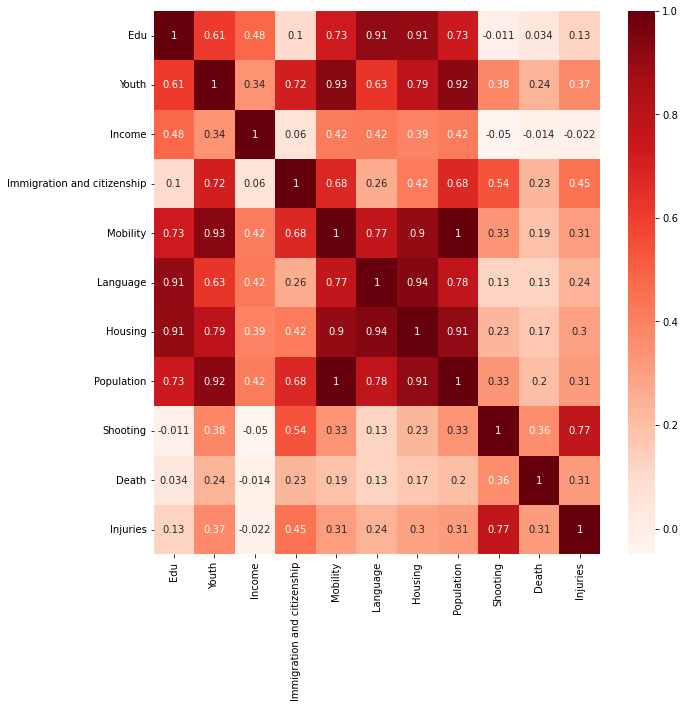

In [105]:
plt.figure(figsize=(10,10))
cor = df_regression.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [108]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics
from matplotlib import pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regr = sm.OLS(y_train, X_train)
pred = regr.fit()
print(pred.summary())
y_pred = pred.predict(X_test)
print("\nMSE for OSL Regression model")
print(metrics.mean_squared_error(y_test, y_pred))

                                 OLS Regression Results                                
Dep. Variable:               Shooting   R-squared (uncentered):                   0.624
Model:                            OLS   Adj. R-squared (uncentered):              0.598
Method:                 Least Squares   F-statistic:                              24.85
Date:                Fri, 11 Mar 2022   Prob (F-statistic):                    1.09e-19
Time:                        16:32:20   Log-Likelihood:                         -283.94
No. Observations:                 112   AIC:                                      581.9
Df Residuals:                     105   BIC:                                      600.9
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

Export to csv:

In [170]:
df2.to_csv("Shootings_cleaned.csv")

In [160]:
df_pop_new.to_csv("population.csv")

In [275]:
df_large_new.to_csv("nbh_selected.csv")